# Digit Classification using Dense Neural Network (DNN) - Version 2 
 - Using validation and test data 

## ==> Verify on Runtime tab if GPU is active on Runtime type

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Upload and Explore Dataset
[MNIST](http://yann.lecun.com/exdb/mnist/) handwritten digits dataset

The MNIST database of handwritten digits, is also available from this [TF page](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data), has a training set of 60,000 28x28 grayscale images of the 10 digits along a test set of 10,000 images. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


In [2]:
data = tf.keras.datasets.mnist

(tt_images, tt_labels), (test_images, test_labels) = data.load_data()

In [3]:
print(tt_images.shape)
print(tt_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [5]:
tt_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

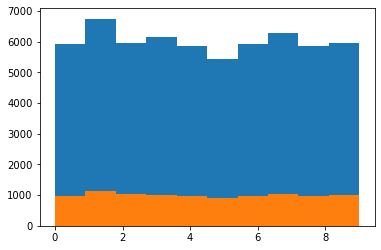

In [6]:
plt.hist(tt_labels);
plt.hist(test_labels);

In [7]:
val_images = tt_images[:10000]
val_labels = tt_labels[:10000]

In [8]:
train_images = tt_images[10000:]
train_labels = tt_labels[10000:]

In [9]:
print(train_images.shape)
print(train_labels.shape)

(50000, 28, 28)
(50000,)


In [10]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


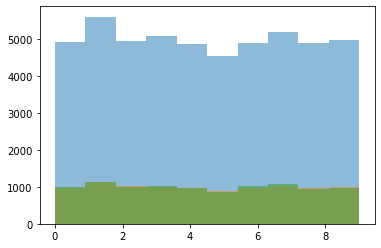

In [11]:
plt.hist(train_labels, alpha=0.5, label='Train')
plt.hist(test_labels, alpha=0.5, label='Val')
plt.hist(val_labels, alpha=0.5, label='Test');

     Label of image 1000 is: 9


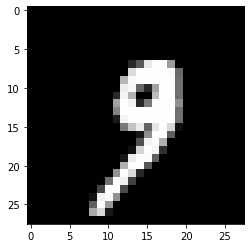

In [12]:
img = 1000
print("     Label of image {} is: {}".format(img, test_labels[img]))
plt.imshow(test_images[img], cmap='gray');

### Preprocessing Data 

**Normalizing Data**: 
We notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [13]:
train_images  = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Define and Compile Model

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [16]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(20, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
#model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 20)                15700     
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [18]:
def create_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  return model 

In [19]:
model = create_model()

In [20]:
model.compile(
    optimizer='adam', # uses default learning_rate=0.001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [21]:
from tensorflow.keras.optimizers import Adam, SGD

In [22]:
opt = Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

## Train the model

You could leave the training data with all samples, and alternativelly use: 
- `validation_split=0.1` instead of `validation_data=(val_images, val_labels)`.

In this case, TF will split the validation data by itself. 

In [25]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=30, 
    validation_data=(val_images, val_labels) 
    )

Epoch 1/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1598 - accuracy: 0.9531 - val_loss: 0.2651 - val_accuracy: 0.9335
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1566 - accuracy: 0.9536 - val_loss: 0.2670 - val_accuracy: 0.9359
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1577 - accuracy: 0.9530 - val_loss: 0.2476 - val_accuracy: 0.9401
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1565 - accuracy: 0.9534 - val_loss: 0.2559 - val_accuracy: 0.9390
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1513 - accuracy: 0.9549 - val_loss: 0.2722 - val_accuracy: 0.9350
Epoch 6/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1547 - accuracy: 0.9540 - val_loss: 0.2611 - val_accuracy: 0.9378
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1521 - accuracy: 0.9551 - val_loss: 0.2504 - val_accuracy:

Inspecting the model

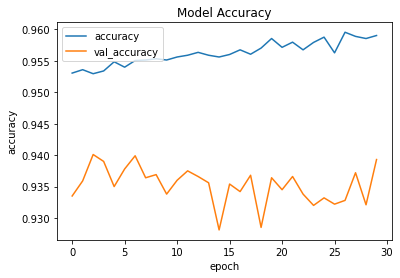

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

If validation accuracy seems “instable”, could be that Learning Rate is high (try to reduce it). 

Let's start over with a lower Lr (for exampe: 0.0001)

In [27]:
opt = Adam(learning_rate=0.001)

model = create_model()
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(val_images, val_labels) 
    )

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4249 - accuracy: 0.8833 - val_loss: 0.2463 - val_accuracy: 0.9309
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2293 - accuracy: 0.9340 - val_loss: 0.1997 - val_accuracy: 0.9421
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1929 - accuracy: 0.9435 - val_loss: 0.1903 - val_accuracy: 0.9453
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1708 - accuracy: 0.9503 - val_loss: 0.1724 - val_accuracy: 0.9510
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1554 - accuracy: 0.9548 - val_loss: 0.1649 - val_accuracy: 0.9524
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9580 - val_loss: 0.1597 - val_accuracy: 0.9531
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1335 - accuracy: 0.9612 - val_loss: 0.1518 - val_accuracy:

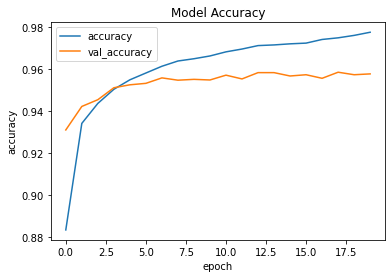

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

## Testing the trained model


In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1540 - accuracy: 0.9579


[0.1540250927209854, 0.9578999876976013]

**Accuracy**
- Train: 0.97; 
- Validation: 0.96 
- Test: 0.95

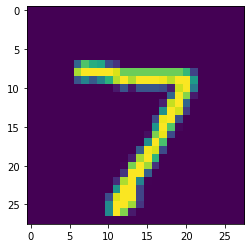

In [30]:
plt.imshow(test_images[0]);

In [31]:
print(test_labels[0])

7


In [32]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 1s 1ms/step
[7.9531094e-07 4.8082649e-10 2.4879162e-08 5.1680114e-04 2.1484227e-12
 2.0510804e-04 1.0435346e-16 9.9926037e-01 6.1953151e-06 1.0662018e-05]


In [33]:
# Returns the indices of the maximum values along an axis.
np.argmax(predictions[0])

7

In [34]:
predictions = np.argmax(predictions, axis=-1)
predictions.shape

(10000,)

In [35]:
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.93      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.92      0.96      0.94       892
           6       0.95      0.97      0.96       958
           7       0.98      0.95      0.96      1028
           8       0.93      0.95      0.94       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [37]:
confusion_matrix(test_labels,predictions)

array([[ 959,    0,    3,    1,    1,    4,    8,    2,    2,    0],
       [   0, 1112,    4,    0,    0,    2,    5,    0,   12,    0],
       [   8,    2,  987,    4,    3,    1,    6,    3,   17,    1],
       [   2,    0,   15,  944,    0,   31,    1,    6,    7,    4],
       [   3,    0,    3,    1,  943,    2,    8,    3,    5,   14],
       [   2,    1,    1,    9,    0,  860,   10,    0,    7,    2],
       [   8,    3,    1,    1,    3,   12,  927,    0,    3,    0],
       [   2,    8,   10,    9,    3,    0,    0,  977,    3,   16],
       [   5,    1,    3,    6,    6,   10,    8,    2,  930,    3],
       [   2,    6,    1,    5,   24,   15,    1,    5,   10,  940]],
      dtype=int64)

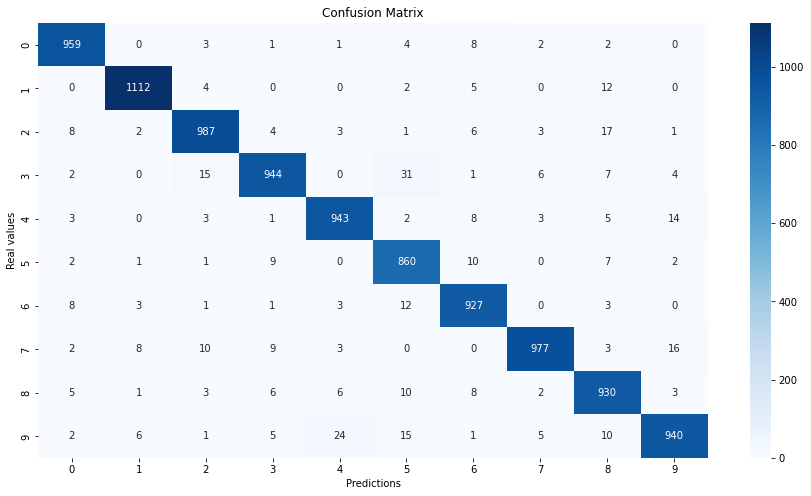

In [38]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap="Blues", annot=True, fmt='g');
plt.title('Confusion Matrix')
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()

In [39]:
model.save('MNIST_v2_model.h5')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop). 